In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import QTable
from astroquery.esasky import ESASky
from astropy.nddata import Cutout2D
from astropy.convolution import Gaussian2DKernel, convolve
from astropy import wcs
import matplotlib.pyplot as plt

In [2]:
def central_emission(hmap, map_w, pixel_w, max_sep):
    #Returns the average surface brightness in Jy/pixel of pixels within max_sep 
    # of the center of hmap (assuming hmap has units MJy/pixel)
    center = map_w + 0.5
    emission = 0
    div = 0
    hist = []
    for i in range(2*map_w):
        for j in range(2*map_w):
            if pixel_w*np.sqrt((center-i)**2+(center-j)**2) <= max_sep:
                hist.append(hmap[i,j])
                div +=1
    return  np.array(hist)

In [3]:
act = fits.open('/home/alex/Desktop/Clusters/actCatalog.fits')

actRA = act[1].data['RADeg']
actDec = act[1].data['decDeg']
actName = act[1].data['name']

In [6]:
hdu = fits.open('/home/alex/Downloads/act/'+actName[0])
w = wcs.WCS(hdu[0].header)
header = hdu[0].header
pixel_size = header.get('CDELT2')*u.deg

In [8]:
# fill stackArr
stackArr = []
#1030 is weird and 2432 has a huge 1.8322204 Jy central flux
i = 0
while i < 1030:#len(actName):
    cutout = fits.open('/home/alex/Downloads/act/'+actName[i])
    stackArr.append(cutout[0].data[0][0])
    i+=1
i = 1031
while i < 2432:#len(actName):
    cutout = fits.open('/home/alex/Downloads/act/'+actName[i])
    stackArr.append(cutout[0].data[0][0])
    i+=1
i = 2433
while i < 3368:#len(actName):
    cutout = fits.open('/home/alex/Downloads/act/'+actName[i])
    stackArr.append(cutout[0].data[0][0])
    i+=1

In [11]:
cutout = fits.open('/home/alex/Downloads/act/'+actName[2432])
# stackArr.append(cutout[0].data[0][0])

# cutout = fits.open('/home/alex/Downloads/ACT-CL J2357.0-3445.fits')
# stackArr.append(cutout[0].data[0][0])

cutout[0].header

# find central flux at cutout locations
#np.sum(central_emission(cutout[0].data[0][0], int(100), pixel_size.to(u.arcmin).value, 1.0))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  721 / length of data axis 1                          
NAXIS2  =                  721 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   9.637127982246E-

In [14]:
# find cluster from cutout's RA/dec
# i = 0
# while(i < len(actRA)):
#     if(actRA[i] < 355 and actRA[i] > 354 and actDec[i] < -35 and actDec[i] > -35.8):
#         print(i)
#     i+=1

In [15]:
# high central emission list
# print(actName[991], #stackArr[754] - central flux 0.61831367
# actName[1490], # stackArr[1110] - central flux 0.30112392
# actName[2454], # stackArr[1890] - central flux 0.522405
# actName[2596], # stackArr[2032] - central flux 0.5134932
# actName[2687], # stackArr[2129] - central flux 0.84579104
# actName[2711], # stackArr[2147] - central flux 0.47407722
# actName[3725], # stackArr[3030] - central flux 0.32335994
# actName[4073]) # stackArr[3276] - central flux 0.0.40357745

In [ ]:
# pick out central emission >300mJy
i = 0
while i < len(stackArr):
    try:
        cent_em = central_emission(stackArr[i], int(100), pixel_size.to(u.arcmin).value, 1.0)
        if(np.sum(cent_em) > .3):
            print(str(i))
    except:
        pass
    i+=1

In [33]:
len(stackArr)

3366

In [16]:
# stacks

In [7]:
# cut excess rows/columns off evens
i = 0
while(i < len(stackArr)):
    if(stackArr[i].shape[0] > 720 and stackArr[i].shape[0] % 2 == 0):
        while(stackArr[i].shape[0] > 720):
            stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[0]-1,0)
            stackArr[i] = np.delete(stackArr[i],0,0)
    if(stackArr[i].shape[1] > 720 and stackArr[i].shape[1] % 2 == 0):
        while(stackArr[i].shape[1] > 720):
            stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[1]-1,1)
            stackArr[i] = np.delete(stackArr[i],0,1)
    i+=1

In [ ]:
# cut excess rows/columns off odds
i = 0
while(i < len(stackArr)):
    if(stackArr[i].size > 518400):
        if(stackArr[i].shape[0] > 720 and stackArr[i].shape[0] % 2 != 0):
            if(stackArr[i].shape[0] == 721):
                stackArr[i] = stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[0]-1,0) 
            else:
                while(stackArr[i].shape[0] > 721):
                    stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[0]-1,0)
                    stackArr[i] = np.delete(stackArr[i],0,0)     
                stackArr[i] = stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[0]-1,0) 
        if(stackArr[i].shape[1] > 720 and stackArr[i].shape[1] % 2 != 0):
            if(stackArr[i].shape[1] == 721):
                stackArr[i] = stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[1]-1,1) 
            else:
                while(stackArr[i].shape[1] > 721):
                    stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[1]-1,1)
                    stackArr[i] = np.delete(stackArr[i],0,1)
                stackArr[i] = stackArr[i] = np.delete(stackArr[i],stackArr[i].shape[1]-1,1) 
    i+=1

In [295]:
def s18dStack(ras, decs, width = 20., weight = False):
    stack = 0
    divisor = 0
    count = 0

    while(divisor < len(stackArr)):
        if len(stackArr[divisor]) == 720 and len(stackArr[divisor][0]) == 720:
            stack += stackArr[divisor]
            count +=1
        divisor += 1

    print("Number in stack: {}".format(count))
    return stack, count

In [296]:
# extent in arcmin for plot axes
w1 = -720*pixel_size.to(u.arcmin)/2
x1 = 720*pixel_size.to(u.arcmin)/2
y1 = -720*pixel_size.to(u.arcmin)/2
z1 = 720*pixel_size.to(u.arcmin)/2

Number in stack: 1


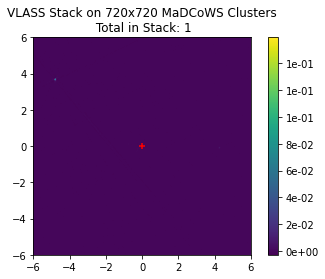

In [299]:
# stacker
s18d_stack, stack_num = s18dStack(actRA, actDec)

out, cen, cen_d, out_d = 0,0,0,0

plot = plt.imshow(s18d_stack, extent = [w1.value,x1.value,y1.value,z1.value])
plt.scatter(0,0, marker = '+', color = 'r')
plt.colorbar(plot, format='%.0e')
plt.title("VLASS Stack on 720x720 MaDCoWS Clusters\n Total in Stack: {}".format(stack_num))
#plt.savefig("vlass_stacks_on_mdcws.pdf")
plt.show()
plt.close()

In [301]:
# give units back to vmap
vmap = s18d_stack*(u.Jy/u.beam)

#Convert from Jy/beam to Jy/pixel
conv_factor = (np.pi*(2.5/2)**2/np.log(2))*(u.pix/u.beam)
vmap = (vmap/conv_factor)

#Smoothing map
filt_scale = 1*u.arcmin
beam_fwhm = 2.5*u.arcsec
smooth_scale = np.sqrt(filt_scale**2-beam_fwhm.to(u.arcmin)**2)

filt_pix = np.round(smooth_scale/pixel_size.to(u.arcmin))
kernel = Gaussian2DKernel(x_stddev =  filt_pix)

hdata = convolve(vmap, kernel) * (u.Jy/u.pix)

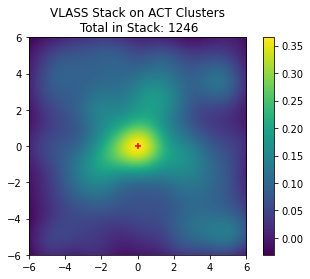

In [20]:
plt.title("VLASS Stack on ACT Clusters\n Total in Stack: {}".format(stack_num))
plt.scatter(0,0, marker = '+', color = 'r')
plt.colorbar(plot)
plt.imshow(hdata, extent = [w1.value,x1.value,y1.value,z1.value])
plt.savefig("/home/alex/Downloads/vlassStackOnACT.pdf",bbox_inches='tight')

In [ ]:
# histogram

In [ ]:
# fill emission stack with flux values for histogram
emissionStack = []
i = 0
while i < len(stackArr):
    try:
        cent_em = central_emission(stackArr[i], int(100), pixel_size.to(u.arcmin).value, 1.0)
        emissionStack.append(np.sum(cent_em))
    except:
        pass
    i+=1

In [115]:
len(emissionStack)

3077

In [116]:
# fill values for histStack ... cut out values below VLASS noise floor
histStack = []
i = 0
while i < len(emissionStack):
    if(emissionStack[i] > 6.9E-5):#combined (3 epoch) sensitivity 69microJy RMS
        histStack.append(emissionStack[i])
    i+=1

In [117]:
len(histStack)

1588

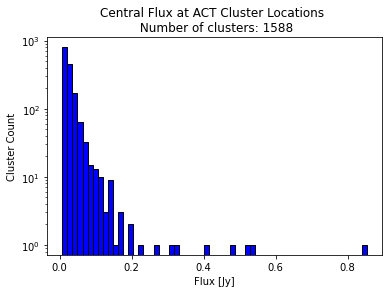

In [118]:
plt.hist(histStack,bins=60,align='right',edgecolor='black',color='blue')
plt.xlabel('Flux [Jy]')
plt.ylabel('Cluster Count')
plt.yscale('log')
plt.title('Central Flux at ACT Cluster Locations \n Number of clusters: ' + str(len(histStack)))
plt.savefig("/home/alex/Downloads/actHistogram.pdf",bbox_inches='tight')
plt.show()